In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data=pd.read_csv('dataset_nan (1).csv')
data.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
des=data.describe()
cm = sns.light_palette("green", as_cmap=True)
s = des.style.background_gradient(cmap=cm)
s

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


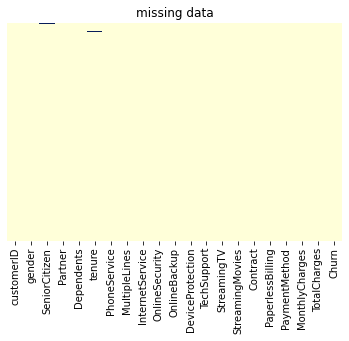

Missing Value:  190


In [44]:
d=data.isnull().sum()
sns.heatmap(data.isnull(),cmap='YlGnBu',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()
print("Missing Value: ",data.isna().sum().values.sum())

In [45]:
data.drop(['customerID'], axis = 1, inplace = True)
data['TotalCharges'] = data['TotalCharges'].fillna(0.0)

In [46]:
data.gender = [1 if x == "Male" else 0 for x in data.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    data[col] = [1 if x == "Yes" else 0 for x in data[col]]        
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,NaN,1,0,NaN,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,NaN,0,0,34.0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


In [47]:
data.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.151711
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
PhoneService        0.011942
gender             -0.008612
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.199428
tenure             -0.347223
Name: Churn, dtype: float64

<AxesSubplot:>

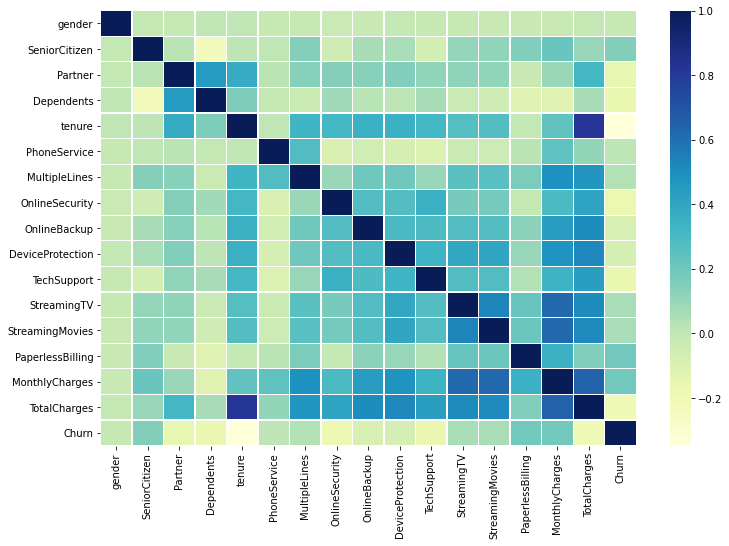

In [48]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.corr(), cmap="YlGnBu",  linewidths=.2,annot = False)

In [49]:
correlated_features = set()  
correlation_matrix = data.corr()

In [50]:
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)
print(correlated_features)

{'TotalCharges', 'tenure'}


In [ ]:
 sns.catplot(data=data,x='Churn',kind = 'count',height=2.6, aspect=1.5)

# Numerical features

In [54]:
def Plot(f):
    plt.figure(figsize=(9,4))
    plt.title("{}".format(f))
    ax0 = sns.kdeplot(data[data['Churn'] == 0][f], color= 'Red', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 1][f], color= 'orange', label= 'Churn: Yes')
  


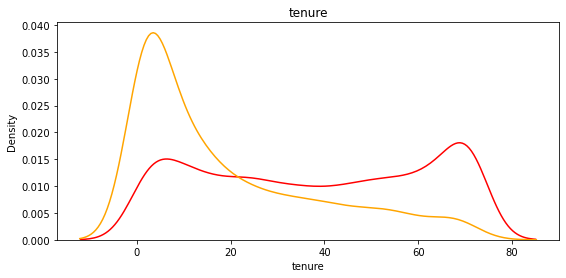

In [57]:
Plot('tenure')


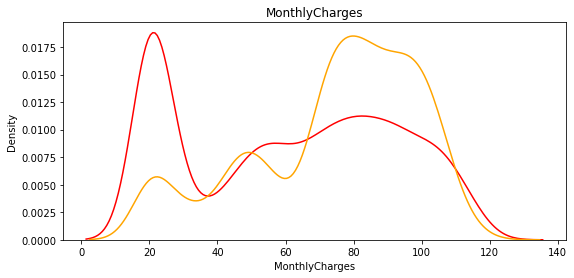

In [58]:
Plot('MonthlyCharges')


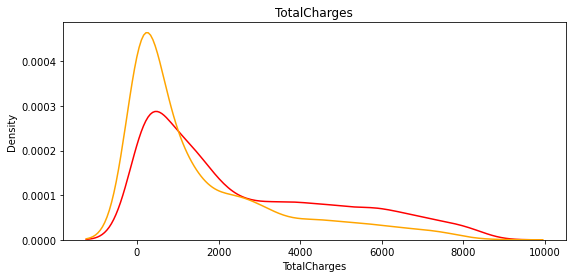

In [59]:
Plot('TotalCharges')

# Categorial features


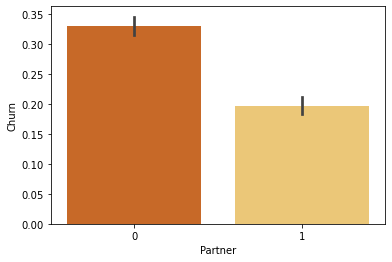

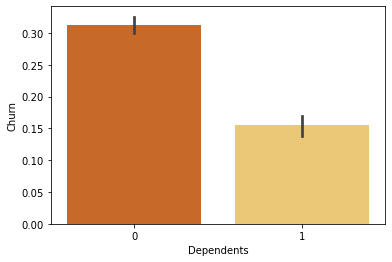

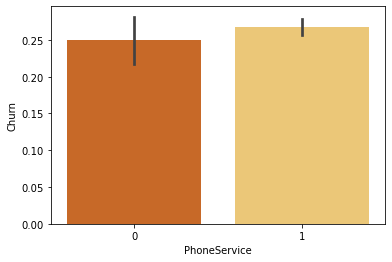

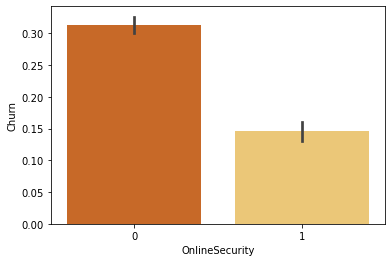

In [38]:
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity'):
    sns.barplot(x = col, y = 'Churn', data = data,palette = "YlOrBr_r")
    plt.show()
    

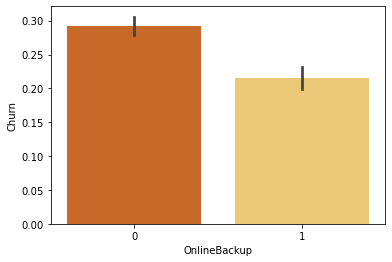

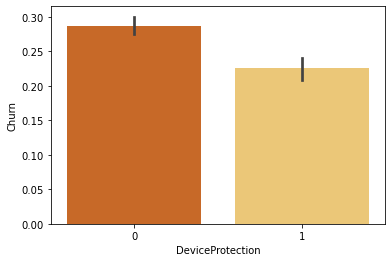

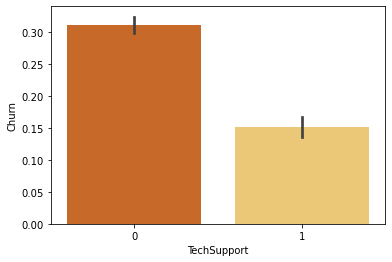

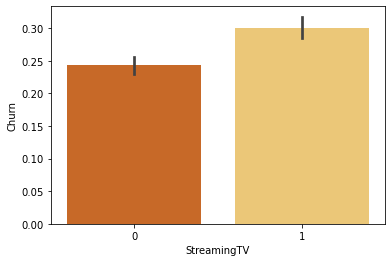

In [60]:
for col in ('OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV'):
    sns.barplot(x = col, y = 'Churn', data = data,palette = "YlOrBr_r")
    plt.show()

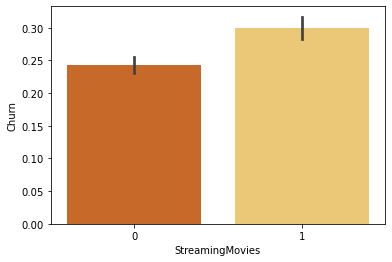

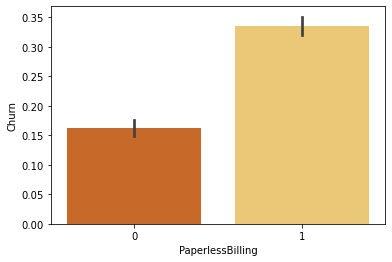

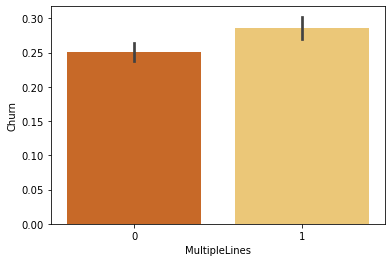

In [61]:
for col in ('StreamingMovies','PaperlessBilling','MultipleLines'):
    sns.barplot(x = col, y = 'Churn', data = data, palette = "YlOrBr_r")
    plt.show()